In [191]:
import  pandas  as  pd 
#settings : 
pd.set_option ( 'display.max_rows' ,  1000 ) 
pd.set_option ( 'display.max_columns' ,  500 ) 
pd.set_option ( 'display.width' ,  1000 ) 
pd.set_option ( 'display.max_colwidth' ,  1000 )
import  numpy  as  np 
import  matplotlib.pyplot  as  plt 
import  seaborn  as  sns
import missingno as msno 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


In [192]:
data = pd.read_csv('CarData.csv')
data.head()

,Car_Name,Year,Current_price,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### Prepare the dataset to try to predict the correct price of the car.
#### Try in different ways. The model is on the code! 
The Target is : Current_price


In [8]:
model = LinearRegression()

In [32]:
data.describe()

,Year,Current_price,Selling_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [4]:
print(data.dtypes)

Car_Name          object
Year               int64
Current_price    float64
Selling_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object


In [193]:
def ordinal(x):
    if x == 'Petrol':
        return 1
    elif x == 'Diesel':
        return 2
    elif x=='CNG':
        return 3
    else:
        return np.NaN

data['Fuel_Type'] = data['Fuel_Type'].apply(ordinal)

data.head()

,Car_Name,Year,Current_price,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,1,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,2,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,1,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,1,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,2,Dealer,Manual,0


In [194]:
def ordinal3(z):
    if z == 'Manual':
        return 1
    elif z  == 'Automatic':
        return 2
    else:
        return np.NaN

data['Transmission'] = data['Transmission'].apply(ordinal3)
data.head()

,Car_Name,Year,Current_price,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,1,Dealer,1,0
1,sx4,2013,4.75,9.54,43000,2,Dealer,1,0
2,ciaz,2017,7.25,9.85,6900,1,Dealer,1,0
3,wagon r,2011,2.85,4.15,5200,1,Dealer,1,0
4,swift,2014,4.60,6.87,42450,2,Dealer,1,0


In [196]:
data['Car_Name'].value_counts()

city                         26
corolla altis                16
verna                        14
fortuner                     11
brio                         10
ciaz                          9
innova                        9
i20                           9
grand i10                     8
jazz                          7
amaze                         7
Royal Enfield Classic 350     7
ertiga                        6
eon                           6
sx4                           6
alto k10                      5
i10                           5
swift                         5
Bajaj Pulsar 150              4
Royal Enfield Thunder 350     4
ritz                          4
wagon r                       4
etios liva                    4
dzire                         4
xcent                         3
etios cross                   3
Royal Enfield Thunder 500     3
TVS Apache RTR 160            3
Yamaha FZ S V 2.0             3
creta                         3
Honda CB Hornet 160R          3
etios g 

In [197]:
def ordinal4(k):
    if k == 'ritz':
        return 1
    elif k == 'sx4':
        return 2
    elif k=='ciaz':
        return 3
    elif k == 'wagon r':
        return 4
    elif k == 'swift':
        return 5
    elif k=='city ':
        return 6
    elif k == 'corolla altis':
        return 7
    elif k=='verna':
        return 8
    elif k == 'fortuner':
        return 9
    elif k == 'brio':
        return 10
    elif k=='innova':
        return 11
    elif k == 'i20':
        return 12
    elif k=='grand i10':
        return 13
    elif k == 'jazz':
        return 14
    elif k == 'amaze':
        return 15
    elif k=='Royal Enfield Classic 350':
        return 16
    elif k == 'ertiga':
        return 17
    elif k=='eon':
        return 18
    elif k == 'alto k10':
        return 19
    elif k == 'i10':
        return 20
    elif k=='Bajaj Pulsar 150':
        return 21
    elif k == 'Royal Enfield Thunder 350':
        return 22
    elif k=='etios liva':
        return 23
    elif k == 'dzire':
        return 24
    elif k == 'xcent':
        return 25
    elif k=='etios cross':
        return 26
    elif k == 'Royal Enfield Thunder 500':
        return 27
    elif k=='TVS Apache RTR 160 ':
        return 28
    elif k == 'Yamaha FZ S V 2.0':
        return 29
    elif k == 'creta':
        return 30
    elif k=='Honda CB Hornet 160R':
        return 31
    elif k == 'etios g':
        return 32
    elif k == 'Bajaj Avenger 220':
        return 33
    elif k == 'Bajaj Pulsar NS 200':
        return 34
    elif k == 'Bajaj Discover 125':
        return 35
    elif k=='TVS Apache RTR 180':
        return 36
    elif k == 'Royal Enfield Thunder 500':
        return 37
    elif k=='TVS Apache RTR 160':
        return 38
    elif k == 'Yamaha FZ S V 2.0':
        return 39
    elif k == 'Honda Activa 4G':
        return 40
    elif k=='Honda CB twister':
        return 41
    elif k == 'Hero Splender iSmart':
        return 42
    elif k == 'Activa 3g':
        return 43
    elif k == 'Hero Passion Pro':
        return 44
    elif k == 'Honda CB Shine':
        return 45
    elif k=='Bajaj Avenger 220 dtsi':
        return 46
    elif k == 'Honda CBR 150':
        return 47
    elif k=='elantra':
        return 48
    elif k == 'Royal Enfield Classic 500':
        return 49
    elif k == 'KTM RC200':
        return 50
    elif k=='Honda Karizma':
        return 51
    elif k == 'Bajaj  ct 100':
        return 52
    elif k == 'KTM RC390':
        return 53
    elif k=='Hyosung GT250R':
        return 54
    elif k == 'KTM 390 Duke':
        return 55
    elif k == 'Mahindra Mojo XT300':
        return 56
    elif k == 'Bajaj Pulsar RS200':
        return 57
    elif k == 'Royal Enfield Bullet 350':
        return 58
    elif k== 'Bajaj Avenger 150 street':
        return 59
    elif k == 'Honda CB Unicorn ':
        return 60
    elif k=='omni':
        return 61
    elif k == 'Hero Passion X pro':
        return 62
    elif k == 'Yamaha Fazer':
        return 63
    elif k=='TVS Sport':
        return 64
    elif k == 'Honda Dream Yuga':
        return 65
    elif k=='etios gd ':
        return 66
    elif k == 'Honda CB Trigger':
        return 67
    elif k == 'Yamaha FZ S':
        return 68
    elif k=='Bajaj Pulsar 135 LS':
        return 69
    elif k == 'Activa 4g':
        return 70
    elif k == 'Bajaj Avenger Street 220':
        return 71
    else:
        return 1

data['Car_Name'] = data['Car_Name'].apply(ordinal4)

data.head()

,Car_Name,Year,Current_price,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,1,2014,3.35,5.59,27000,1,Dealer,1,0
1,2,2013,4.75,9.54,43000,2,Dealer,1,0
2,3,2017,7.25,9.85,6900,1,Dealer,1,0
3,4,2011,2.85,4.15,5200,1,Dealer,1,0
4,5,2014,4.60,6.87,42450,2,Dealer,1,0


In [159]:
data.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [198]:
def ordinal6(x):
    if x == 'Dealer':
        return 1
    elif x == 'Individual':
        return 2
    else:
        return np.NaN

data['Seller_Type'] = data['Seller_Type'].apply(ordinal6)

data.head()

,Car_Name,Year,Current_price,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,1,2014,3.35,5.59,27000,1,1,1,0
1,2,2013,4.75,9.54,43000,2,1,1,0
2,3,2017,7.25,9.85,6900,1,1,1,0
3,4,2011,2.85,4.15,5200,1,1,1,0
4,5,2014,4.60,6.87,42450,2,1,1,0


In [199]:
X= data[['Car_Name','Year','Selling_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]
y = data['Current_price']

In [200]:
data.describe()


,Car_Name,Year,Current_price,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,16.285714,2013.627907,4.661296,7.628472,36947.205980,1.212625,1.352159,1.132890,0.043189
std,16.324361,2.891554,5.082812,8.644115,38886.883882,0.425801,0.478439,0.340021,0.247915
min,1.000000,2003.000000,0.100000,0.320000,500.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,2012.000000,0.900000,1.200000,15000.000000,1.000000,1.000000,1.000000,0.000000
50%,11.000000,2014.000000,3.600000,6.400000,32000.000000,1.000000,1.000000,1.000000,0.000000
75%,23.000000,2016.000000,6.000000,9.900000,48767.000000,1.000000,2.000000,1.000000,0.000000
max,71.000000,2018.000000,35.000000,92.600000,500000.000000,3.000000,2.000000,2.000000,3.000000


In [219]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    int64  
 1   Year           301 non-null    int64  
 2   Current_price  301 non-null    float64
 3   Selling_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    int64  
 6   Seller_Type    301 non-null    int64  
 7   Transmission   301 non-null    int64  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 21.3 KB


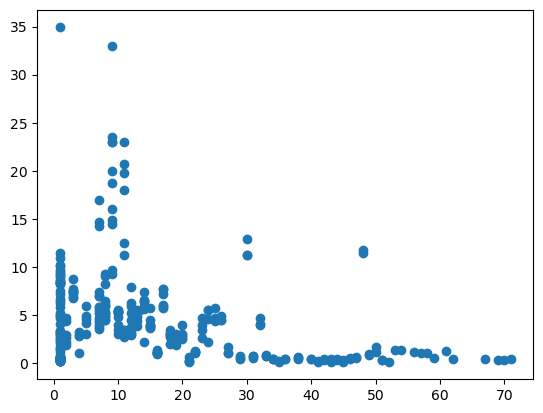

In [220]:
plt.scatter(data['Car_Name'],data['Current_price'])

In [221]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [217]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
pred_model = model.predict(X_test)

In [214]:

predictions = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, predictions)
print('MAE: %.3f' % mae)

MAE: 0.283


In [218]:
clf.score(X_test,y_test)

-0.8118502529802718